In [1]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [8]:
revision_folder = "/hps/nobackup2/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/REVISION/"

In [9]:
crm_int_file = paste0(revision_folder, "CRM_interaction_chr22/results_permG/summary.csv")
crm_int = read.csv(crm_int_file, row.names=1)
nrow(crm_int)
head(crm_int,2)

[1] 542

,gene,n_snps,chrom,pv_raw,snpID
0,ENSG00000100028,2,22,0.8564981,22_24852233_T_A
1,ENSG00000100028,2,22,0.8014707,22_24853465_G_A


In [10]:
genes = as.character(unique(crm_int$gene))
# head(genes)

In [11]:
fvf_filename = paste0(revision_folder,"/CRM_interaction_chr22/fvf.csv")
fvf = read.csv(fvf_filename, row.names=1)
head(fvf)
all_genes = unique(gsub("_.*","",fvf$feature))
# head(all_genes)

feature,snpID,chrom
ENSG00000100206_DMC1,22_38815543_G_T,22
ENSG00000100206_DMC1,22_38815767_C_T,22
ENSG00000100206_DMC1,22_38816059_T_C,22
ENSG00000100206_DMC1,22_38816351_G_A,22
ENSG00000100206_DMC1,22_38817047_A_G,22
ENSG00000100206_DMC1,22_38817105_C_T,22


In [12]:
missing_genes = all_genes[!(all_genes %in% genes)]
as.character(unique(fvf[gsub("_.*","",fvf$feature) %in% missing_genes,"feature"]))

character(0)

In [13]:
options(repr.plot.width=6, repr.plot.height=3)

[1] 0.5728746

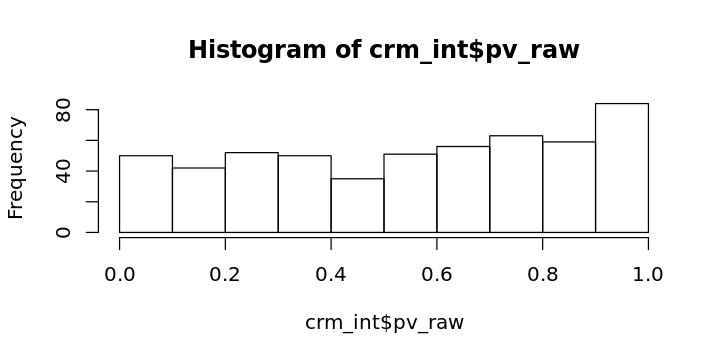

In [14]:
median(crm_int$pv_raw)
hist(crm_int$pv_raw)

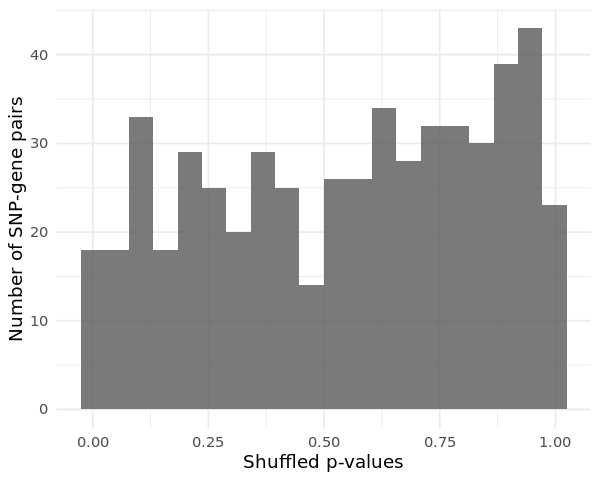

In [15]:
options(repr.plot.width=5, repr.plot.height=4)
ggplot(crm_int, aes(x=pv_raw)) + geom_histogram(alpha = 0.8, bins=20) + 
    xlab("Shuffled p-values") + 
    ylab("Number of SNP-gene pairs") + theme_minimal()

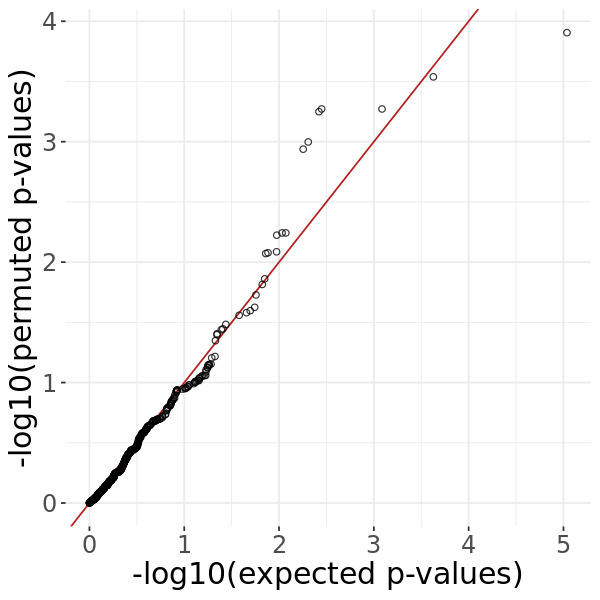

In [46]:
options(repr.plot.width=5, repr.plot.height=5)
crm_int$pv_uniform = runif(dim(crm_int)[1], min = 0, max = 1)
ggplot(crm_int, aes(x = sort(-log10(pv_uniform)), y = sort(-log10(pv_raw)))) + 
    geom_abline(slope = 1, intercept = 0, col = "firebrick") +
    geom_point(alpha = 0.8, pch = 1) + xlab("-log10(expected p-values)") + ylab("-log10(permuted p-values)") +
    theme_bw() +# xlim(c(0,4)) + ylim(c(0,4)) +
    theme(legend.position="none", panel.border = element_blank()) + theme(text = element_text(size=18))

In [17]:
# crm_int = crm_int[order(crm_int$pv_raw),]
# crm_int1 = crm_int[-which(duplicated(crm_int$gene)),]
# c(nrow(crm_int), nrow(crm_int1))

# crm_int1$pv_uniform = runif(dim(crm_int1)[1], min = 0, max = 1)
# ggplot(crm_int1, aes(x = sort(-log10(pv_uniform)), y = sort(-log10(pv_raw)))) + 
#     geom_abline(slope = 1, intercept = 0, col = "firebrick") +
#     geom_point(alpha = 0.8, pch = 1) + 
#     xlab("-log10(expected p-values)") + ylab("-log10(permuted p-values)") +
#     theme_bw() + #xlim(c(0,2.5)) + ylim(c(0,2.5)) +
#     theme(legend.position="none", panel.border = element_blank())

In [413]:
all_crm_int_file = paste0(revision_folder, "CRM_interaction_chr22/results/summary.csv")
all_crm_int = read.csv(all_crm_int_file, row.names=1)
nrow(all_crm_int)
head(all_crm_int,2)

[1] 140564

,gene,n_snps,chrom,pv_raw,snpID
0,ENSG00000128159,10,22,0.64912024,22_50633048_T_G
1,ENSG00000128159,10,22,0.06923793,22_50633686_T_C


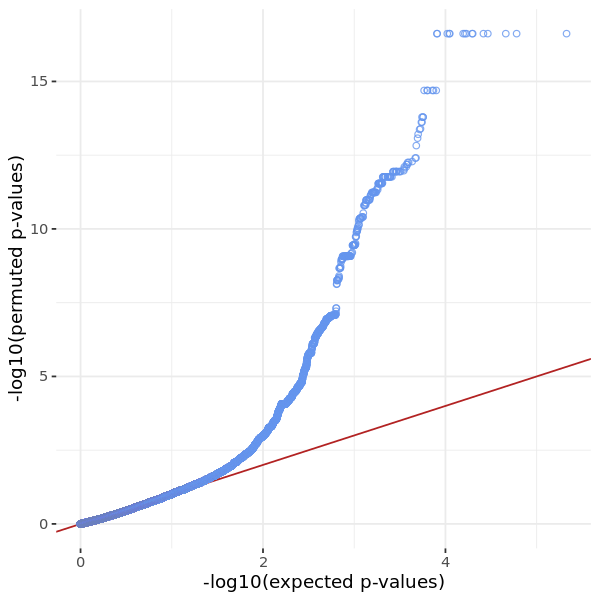

In [414]:
options(repr.plot.width=5, repr.plot.height=5)
all_crm_int$pv_uniform = runif(dim(all_crm_int)[1], min = 0, max = 1)
ggplot(all_crm_int, aes(x = sort(-log10(pv_uniform)), y = sort(-log10(pv_raw)))) + 
    geom_abline(slope = 1, intercept = 0, col = "firebrick") +
    geom_point(alpha = 0.8, pch = 1, col = "cornflowerblue") + 
    xlab("-log10(expected p-values)") + ylab("-log10(permuted p-values)") +
    theme_bw() + #xlim(c(0,2.5)) + ylim(c(0,2.5)) +
    theme(legend.position="none", panel.border = element_blank())

In [415]:
# all_crm_int = all_crm_int[order(all_crm_int$pv_raw),]
# all_crm_int1 = all_crm_int[-which(duplicated(all_crm_int$gene)),]
# c(nrow(all_crm_int), nrow(all_crm_int1))

# all_crm_int1$pv_uniform = runif(dim(all_crm_int1)[1], min = 0, max = 1)
# ggplot(all_crm_int1, aes(x = sort(-log10(pv_uniform)), y = sort(-log10(pv_raw)))) + 
#     geom_abline(slope = 1, intercept = 0, col = "firebrick") +
#     geom_point(alpha = 0.8, pch = 1, col = "cornflowerblue") + 
#     xlab("-log10(expected p-values)") + ylab("-log10(permuted p-values)") +
#     theme_bw() + #xlim(c(0,2.5)) + ylim(c(0,2.5)) +
#     theme(legend.position="none", panel.border = element_blank())

In [416]:
df = inner_join(all_crm_int, crm_int, by = c("gene","snpID","chrom"), suffix=c("",".perm"))
nrow(df)
head(df,2)

[1] 528

gene,n_snps,chrom,pv_raw,snpID,pv_uniform,n_snps.perm,pv_raw.perm,pv_uniform.perm
ENSG00000100028,10,22,0.9774440,22_24852233_T_A,0.358130,2,0.8564981,0.2098430
ENSG00000100028,10,22,0.9568955,22_24853465_G_A,0.969403,2,0.8014707,0.5236537


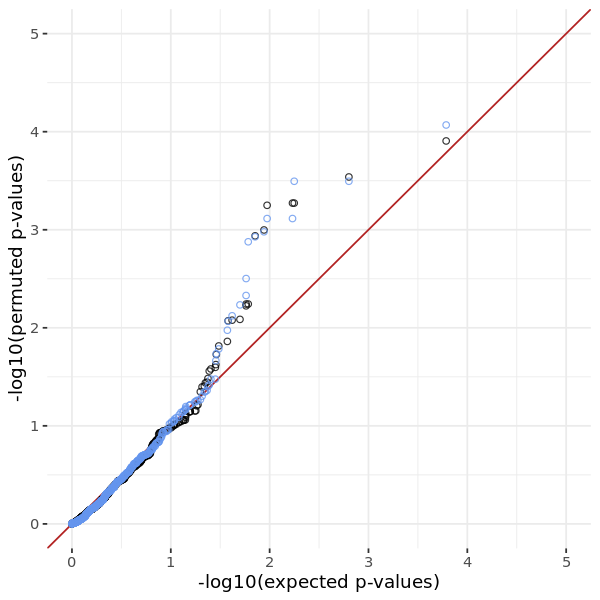

In [417]:
df$pv_uniform = runif(dim(df)[1], min = 0, max = 1)
ggplot(df, aes(x = sort(-log10(pv_uniform)), y = sort(-log10(pv_raw.perm)))) + 
    geom_abline(slope = 1, intercept = 0, col = "firebrick") +
    geom_point(alpha = 0.8, pch = 1) + xlab("-log10(expected p-values)") + ylab("-log10(permuted p-values)") +
    geom_point(color = "cornflowerblue", alpha = 0.8, pch = 1, 
                   aes(x = sort(-log10(pv_uniform)), y = sort(-log10(pv_raw)))) +
    theme_bw() + xlim(c(0,5)) + ylim(c(0,5)) +
    theme(legend.position="none", panel.border = element_blank())